In [22]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib as mpl
import seaborn as sns

sys.path.append('./../src/')
from manuscript import sankey_side_by_side as sankey
from manuscript import datasets, inout, export

pd.set_option('display.max_columns', None)

#pretty
mpl.rcParams['pdf.fonttype'] = 42  # edit-able in illustrator
mpl.rcParams['font.sans-serif'] = 'Arial'
pd.set_option('display.max_columns', None)

from tqdm.notebook import tqdm

import matplotlib.pyplot as plt

from tableone import TableOne, load_dataset

In [23]:
user = 'CAG'     # defines top hierarchy of output folder
outfolder = '07b_cluster_descriptions'    # name of notebook

def dump_table(df, name):
    export.full_frame(
        user, 
        f'{outfolder}/{name}', 
        df, 
        index=True,
        date=True
    )

def dump_figure(name):
    export.image(
        user,
        f'{outfolder}/{name}',
    )

In [24]:
data = pd.read_csv(
    inout.get_material_path('general/05_join_clusters_umap/05_data_umap_clusters_221104_1154.csv.gz'), 
    index_col=0)

In [25]:
data.columns

Index(['Patient_id', 'External_transfer_flag', 'Admission_source_name',
       'Discharge_disposition', 'Binary_outcome', 'Global_cause_failure',
       'Patient_category', 'COVID_status', 'Age', 'Ethnicity', 'Gender',
       'Race', 'Smoking_status', 'BMI', 'Admit_APS_score', 'Admit_SOFA_score',
       'Cumulative_ICU_days', 'Number_of_ICU_stays', 'Tracheostomy_flag',
       'Cumulative_intubation_days', 'ICU_stay', 'ICU_day', 'SOFA_score',
       'ECMO_flag', 'Intubation_flag', 'Hemodialysis_flag', 'CRRT_flag',
       'Temperature', 'Heart_rate', 'Systolic_blood_pressure',
       'Diastolic_blood_pressure', 'Mean_arterial_pressure',
       'Norepinephrine_rate', 'Norepinephrine_flag', 'Respiratory_rate',
       'Oxygen_saturation', 'Urine_output', 'GCS_eye_opening',
       'GCS_motor_response', 'GCS_verbal_response', 'RASS_score', 'PEEP',
       'FiO2', 'Plateau_Pressure', 'Lung_Compliance', 'PEEP_changes',
       'Respiratory_rate_changes', 'FiO2_changes', 'ABG_pH', 'ABG_PaCO2',
   

In [14]:
data.groupby('clusters')[ 'Temperature', 'Heart_rate', 'Systolic_blood_pressure',
       'Diastolic_blood_pressure', 'Mean_arterial_pressure',
       'Norepinephrine_rate', 'Norepinephrine_flag', 'Respiratory_rate',
       'Oxygen_saturation', 'Urine_output', 'GCS_eye_opening',
       'GCS_motor_response', 'GCS_verbal_response', 'RASS_score', 'PEEP',
       'FiO2', 'Plateau_Pressure', 'Lung_Compliance', 'PEEP_changes',
       'Respiratory_rate_changes', 'FiO2_changes', 'ABG_pH', 'ABG_PaCO2',
       'ABG_PaO2', 'PaO2FIO2_ratio', 'WBC_count', 'Lymphocytes', 'Neutrophils',
       'Hemoglobin', 'Platelets', 'Bicarbonate', 'Creatinine', 'Albumin',
       'Bilirubin', 'CRP', 'D_dimer', 'Ferritin', 'LDH', 'Lactic_acid',
       'Procalcitonin',].median().transpose()

/var/folders/8m/9j2wrs6d6zbcpn17t7n7g8w80000gn/T/ipykernel_69663/2934135306.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('clusters')[ 'Temperature', 'Heart_rate', 'Systolic_blood_pressure',


clusters,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Temperature,99.371429,98.736667,98.658333,98.333333,99.179167,99.266667,98.637500,98.757273,98.189402,98.575000,98.150000,98.113826,99.032738,97.900000
Heart_rate,78.888889,99.080000,81.075000,88.029412,81.625000,101.576296,85.000000,101.898268,98.552083,89.000000,92.775000,88.313840,93.295833,91.433333
Systolic_blood_pressure,126.583333,125.600000,129.458333,130.155000,113.025641,119.052727,111.518519,127.274791,101.155870,110.041667,113.800000,119.687826,112.700321,110.629630
Diastolic_blood_pressure,63.208333,67.680000,66.142857,69.977273,57.196429,60.014286,56.463415,65.934266,56.560345,53.483397,56.189189,61.356410,53.307598,51.473333
Mean_arterial_pressure,66.000000,72.000000,71.000000,76.000000,62.000000,62.000000,59.000000,71.000000,60.000000,59.000000,61.000000,64.000000,60.000000,56.000000
Norepinephrine_rate,0.040898,0.045039,0.059915,0.058874,0.059934,0.083480,0.091069,0.110604,0.110185,0.138972,0.087873,0.074758,0.089378,0.133568
Norepinephrine_flag,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
Respiratory_rate,21.375000,24.866667,18.523810,23.411765,24.805556,26.444444,19.933333,24.809524,22.821429,28.579802,20.400000,19.651709,29.846154,22.684211
Oxygen_saturation,95.666667,98.240000,98.000000,95.440000,95.200000,95.565942,98.166667,96.575758,96.033370,95.384615,95.533482,98.325855,94.620690,98.000000
Urine_output,1725.000000,1082.500000,1105.000000,1080.000000,1320.000000,1675.000000,685.000000,1750.000000,760.000000,661.500000,1595.000000,1500.000000,1817.500000,45.500000


In [4]:

from tableone import TableOne, load_dataset

In [12]:
mytable = TableOne(data, columns=['ECMO_flag', 'Intubation_flag', 'Hemodialysis_flag', 'CRRT_flag',
       'Temperature', 'Heart_rate', 'Systolic_blood_pressure',
       'Diastolic_blood_pressure', 'Mean_arterial_pressure',
       'Norepinephrine_rate', 'Norepinephrine_flag', 'Respiratory_rate',
       'Oxygen_saturation', 'Urine_output', 'GCS_eye_opening',
       'GCS_motor_response', 'GCS_verbal_response', 'RASS_score', 'PEEP',
       'FiO2', 'Plateau_Pressure', 'Lung_Compliance', 'PEEP_changes',
       'Respiratory_rate_changes', 'FiO2_changes', 'ABG_pH', 'ABG_PaCO2',
       'ABG_PaO2', 'PaO2FIO2_ratio', 'WBC_count', 'Lymphocytes', 'Neutrophils',
       'Hemoglobin', 'Platelets', 'Bicarbonate', 'Creatinine', 'Albumin',
       'Bilirubin', 'CRP', 'D_dimer', 'Ferritin', 'LDH', 'Lactic_acid',
       'Procalcitonin',], 
                   categorical=[ 'ECMO_flag', 'Intubation_flag', 'Hemodialysis_flag', 'CRRT_flag', ], 
                   nonnormal = [  'Temperature', 'Heart_rate', 'Systolic_blood_pressure',
       'Diastolic_blood_pressure', 'Mean_arterial_pressure',
       'Norepinephrine_rate', 'Norepinephrine_flag', 'Respiratory_rate',
       'Oxygen_saturation', 'Urine_output', 'GCS_eye_opening',
       'GCS_motor_response', 'GCS_verbal_response', 'RASS_score', 'PEEP',
       'FiO2', 'Plateau_Pressure', 'Lung_Compliance', 'PEEP_changes',
       'Respiratory_rate_changes', 'FiO2_changes', 'ABG_pH', 'ABG_PaCO2',
       'ABG_PaO2', 'PaO2FIO2_ratio', 'WBC_count', 'Lymphocytes', 'Neutrophils',
       'Hemoglobin', 'Platelets', 'Bicarbonate', 'Creatinine', 'Albumin',
       'Bilirubin', 'CRP', 'D_dimer', 'Ferritin', 'LDH', 'Lactic_acid',
       'Procalcitonin', ],
                   groupby='clusters',)
mytable

/Users/catgaohow/opt/anaconda3/lib/python3.9/site-packages/tableone/tableone.py:991: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df['percent'] = df['freq'].div(df.freq.sum(level=0),
/Users/catgaohow/opt/anaconda3/lib/python3.9/site-packages/tableone/tableone.py:991: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df['percent'] = df['freq'].div(df.freq.sum(level=0),
/Users/catgaohow/opt/anaconda3/lib/python3.9/site-packages/tableone/tableone.py:991: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df['percent'] =

Grouped by clusters                                                                                                                                                                                                                                                                                                                                                                
                                                       Missing                Overall                       1                     10                       11                      12                      13                      14                      2                      3                      4                      5                      6                      7                      8                       9
n                                                                               12495                     713                   1010                     1224                     802                     702                     931                    793                   1009                   1188                    639                    810                   1579                    592                     503
ECMO_flag, n (%)                         0                   0           10063 (80.5)              708 (99.3)             974 (96.4)               157 (12.8)                12 (1.5)              653 (93.0)              644 (69.2)             672 (84.7)            1007 (99.8)            1170 (98.5)             634 (99.2)             788 (97.3)            1562 (98.9)             584 (98.6)              498 (99.0)
                                         1                                2432 (19.5)                 5 (0.7)               36 (3.6)              1067 (87.2)              790 (98.5)                49 (7.0)              287 (30.8)             121 (15.3)                2 (0.2)               18 (1.5)                5 (0.8)               22 (2.7)               17 (1.1)                8 (1.4)                 5 (1.0)
Intubation_flag, n (%)                   0                   0            1958 (15.7)                13 (1.8)               26 (2.6)                 19 (1.6)                33 (4.1)                 1 (0.1)                34 (3.7)               50 (6.3)               16 (1.6)            1063 (89.5)               11 (1.7)               13 (1.6)               26 (1.6)             214 (36.1)              439 (87.3)
                                         1                               10537 (84.3)              700 (98.2)             984 (97.4)              1205 (98.4)              769 (95.9)              701 (99.9)              897 (96.3)             743 (93.7)             993 (98.4)             125 (10.5)             628 (98.3)             797 (98.4)            1553 (98.4)             378 (63.9)               64 (12.7)
Hemodialysis_flag, n (%)                 0                   0           11849 (94.8)              698 (97.9)             985 (97.5)              1207 (98.6)              774 (96.5)              700 (99.7)              858 (92.2)             667 (84.1)             915 (90.7)            1168 (98.3)             634 (99.2)             796 (98.3)            1435 (90.9)             550 (92.9)              462 (91.8)
                                         1                                  646 (5.2)                15 (2.1)               25 (2.5)                 17 (1.4)                28 (3.5)                 2 (0.3)                73 (7.8)             126 (15.9)               94 (9.3)               20 (1.7)                5 (0.8)               14 (1.7)              144 (9.1)               42 (7.1)                41 (8.2)
CRRT_flag, n (%)                         0                   0           10637 (85.1)              708 (99.3)             666 (65.9)               972 (79.4)              791 (98.6)              677 (96.4)              265 (28.5)             776 (97.9)             967 (95.8)            1183 (99.6)          

In [13]:
dump_table(mytable, '07b_cluster_decriptions.csv.gz')

We interpret the need for ECMO in a subset of these patients as evidence of their tendency for prolonged and severe respiratory failure, not an independent driver of their LOS. Furthermore, the requirement for ECMO explained only XX% of the excess length of stay in patients with SARS-CoV-2 pneumonia compared to those infected with other pathogens. Indeed, after subsetting on the group of patients in our cohort who did not receive ECMO, the significant difference in ICU LOS between patients with and without COVID-19 persisted. 

In [35]:
dem= data.drop_duplicates(subset='Patient_id')

In [36]:
single = data.sort_values('ECMO_flag', ascending=False).drop_duplicates(subset='Patient_id')

In [37]:
no_ecmo = single[single.ECMO_flag==0]

In [38]:
no_ecmo.shape

(531, 78)

In [39]:
single.ECMO_flag.value_counts()

0    531
1     54
Name: ECMO_flag, dtype: int64

In [40]:
dem.groupby('Patient_category').size()

Patient_category
COVID-19                 190
Non-Pneumonia Control     93
Other Pneumonia          252
Other Viral Pneumonia     50
dtype: int64

In [41]:
no_ecmo.groupby('Patient_category').size()

Patient_category
COVID-19                 153
Non-Pneumonia Control     88
Other Pneumonia          242
Other Viral Pneumonia     48
dtype: int64

In [42]:
no_ecmo.groupby('Patient_category')['Cumulative_ICU_days'].describe()

,count,mean,std,min,25%,50%,75%,max
Patient_category,,,,,,,,
COVID-19,153.0,23.725490,16.706143,3.0,12.0,18.0,34.00,86.0
Non-Pneumonia Control,88.0,11.079545,10.026656,1.0,4.0,7.5,15.25,49.0
Other Pneumonia,242.0,14.173554,12.444851,1.0,5.0,10.0,19.00,86.0
Other Viral Pneumonia,48.0,13.354167,8.940678,2.0,7.0,11.0,18.25,44.0


In [43]:
no_ecmo.groupby('Patient_category')['Cumulative_intubation_days'].describe()

,count,mean,std,min,25%,50%,75%,max
Patient_category,,,,,,,,
COVID-19,153.0,21.372549,17.157123,2.0,9.0,15.0,30.00,82.0
Non-Pneumonia Control,88.0,8.431818,9.573425,0.0,2.0,4.5,11.00,49.0
Other Pneumonia,242.0,12.119835,12.253804,0.0,4.0,8.0,17.00,80.0
Other Viral Pneumonia,48.0,9.666667,8.103935,1.0,3.0,8.0,13.25,34.0


/var/folders/8m/9j2wrs6d6zbcpn17t7n7g8w80000gn/T/ipykernel_13185/946320821.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_ecmo['Patient_category'] = pd.Categorical(no_ecmo['Patient_category'],


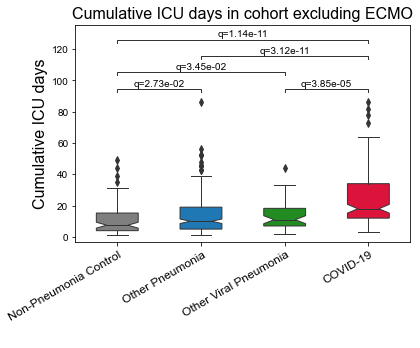

In [44]:
import itertools

import statsmodels.stats.multitest
import statannotations.Annotator
import scipy.stats

no_ecmo['Patient_category'] = pd.Categorical(no_ecmo['Patient_category'],
                                   categories=['Non-Pneumonia Control', 'Other Pneumonia', 'Other Viral Pneumonia', 'COVID-19'],
                                   ordered=True)
Category_palette = [
    "tab:gray",
    "tab:blue",
    "forestgreen",
    "crimson",
]


fig, ax = plt.subplots()

stats_results = []

for d1, d2 in itertools.combinations(no_ecmo.Patient_category.unique(), 2):
        days1 = no_ecmo.Cumulative_ICU_days[no_ecmo.Patient_category==d1].dropna()
        days2 = no_ecmo.Cumulative_ICU_days[no_ecmo.Patient_category==d2].dropna()
        if days1.size == 0 or days2.size == 0:
            continue
        pval = scipy.stats.mannwhitneyu(days1, days2).pvalue
        stats_results.append([d1, d2, days1.size, days2.size, pval])

stats_results = pd.DataFrame(stats_results, columns=["group1", "group2",
                                                   "group1_size", "group2_size", "pval"])
stats_results["pval_adj"] = statsmodels.stats.multitest.fdrcorrection(stats_results.pval, alpha=0.05)[1]
stat_results_sign = stats_results.loc[stats_results.pval_adj < 0.05, :]
pairs = []
for _, r in stat_results_sign.iterrows():
        pairs.append((r.group1, r.group2))

sns.boxplot(
    data=no_ecmo, 
    x="Patient_category",
    y="Cumulative_ICU_days", 
    ax=ax, 
    saturation=1, 
    linewidth=1,
    width=0.5,
    notch=True, 
    palette = Category_palette,
)

for a in ax.collections:
    if isinstance(a, mpl.collections.PatchCollection):
        # remove line surround each box
        a.set_linewidth(0)
ax.set_ylabel("Cumulative ICU days", size=16)
ax.set_xlabel(" ", size=16)
#ax.set_xticklabels(["non-COVID", "COVID"], size=16)
#ax.legend(loc="upper left")
#ax.legend_.set_bbox_to_anchor((1, 0.8))
ax.tick_params(axis='x', labelsize=12)
trans = mpl.transforms.Affine2D().translate(6, 0)
for t in ax.get_xticklabels():
    t.set_rotation(30)
    t.set_horizontalalignment("right")
    t.set_transform(t.get_transform() + trans)
ax.set_title("Cumulative ICU days in cohort excluding ECMO", size=16);


annotator = statannotations.Annotator.Annotator(
    ax, 
    pairs, 
    data=no_ecmo, 
    x="Patient_category",
    y="Cumulative_ICU_days", 
    verbose=False
)
annotator._verbose = False
annotator.configure(line_width=1)
annotator.set_custom_annotations([f"q={x:.2e}" for x in stat_results_sign.pval_adj])
annotator.annotate();


dump_figure('no_ecmo_Cumulative_ICU_days.pdf')

What percentage of the respective cohorts arrived already intubated? And what percentage were transferred back to their referring center intubated?

In [45]:
single.External_transfer_flag.value_counts()

0    401
1    184
Name: External_transfer_flag, dtype: int64

In [86]:
184/585

0.3145299145299145

In [46]:
not_transferred = single[single.External_transfer_flag==0]

In [47]:
not_transferred.groupby('Patient_category')['Cumulative_ICU_days'].describe()

,count,mean,std,min,25%,50%,75%,max
Patient_category,,,,,,,,
COVID-19,131.0,24.687023,20.498812,3.0,12.50,18.0,32.50,156.0
Non-Pneumonia Control,60.0,10.100000,8.368018,1.0,3.75,7.5,15.00,35.0
Other Pneumonia,178.0,14.196629,12.765180,1.0,5.00,10.0,18.75,80.0
Other Viral Pneumonia,32.0,12.750000,9.574833,3.0,7.00,10.0,17.25,44.0


In [48]:
not_transferred.groupby('Patient_category')['Cumulative_intubation_days'].describe()

,count,mean,std,min,25%,50%,75%,max
Patient_category,,,,,,,,
COVID-19,131.0,21.923664,20.508017,2.0,9.0,16.0,28.00,150.0
Non-Pneumonia Control,60.0,7.700000,7.456768,1.0,2.0,4.5,11.00,33.0
Other Pneumonia,178.0,12.191011,12.403641,0.0,4.0,7.0,17.00,64.0
Other Viral Pneumonia,32.0,8.437500,8.095947,1.0,3.0,5.5,10.25,31.0


In [49]:
data[(data.External_transfer_flag==1)].drop_duplicates(subset='Patient_id').Intubation_flag.value_counts()

1    139
0     45
Name: Intubation_flag, dtype: int64

In [50]:
data[(data.External_transfer_flag==1)&(data.Patient_category=='COVID-19')].drop_duplicates(subset='Patient_id').Intubation_flag.value_counts()

1    52
0     7
Name: Intubation_flag, dtype: int64

In [51]:
data.groupby('COVID_status')['ECMO_flag'].value_counts()

COVID_status  ECMO_flag
False         0            5807
              1             865
True          0            4256
              1            1567
Name: ECMO_flag, dtype: int64

In [52]:
data.groupby('COVID_status').size()

COVID_status
False    6672
True     5823
dtype: int64

In [114]:
data.drop_duplicates(subset='Patient_id').shape

(585, 78)

In [115]:
data[data.Intubation_flag==1].drop_duplicates(subset='Patient_id').shape

(584, 78)

In [117]:
intub = data[data.Intubation_flag==1].drop_duplicates(subset='Patient_id').Patient_id

In [118]:
data[~data.Patient_id.isin(intub)]

,Patient_id,External_transfer_flag,Admission_source_name,Discharge_disposition,Binary_outcome,Global_cause_failure,Patient_category,COVID_status,Age,Ethnicity,Gender,Race,Smoking_status,BMI,Admit_APS_score,Admit_SOFA_score,Cumulative_ICU_days,Number_of_ICU_stays,Tracheostomy_flag,Cumulative_intubation_days,ICU_stay,ICU_day,SOFA_score,ECMO_flag,Intubation_flag,Hemodialysis_flag,CRRT_flag,Temperature,Heart_rate,Systolic_blood_pressure,Diastolic_blood_pressure,Mean_arterial_pressure,Norepinephrine_rate,Norepinephrine_flag,Respiratory_rate,Oxygen_saturation,Urine_output,GCS_eye_opening,GCS_motor_response,GCS_verbal_response,RASS_score,PEEP,FiO2,Plateau_Pressure,Lung_Compliance,PEEP_changes,Respiratory_rate_changes,FiO2_changes,ABG_pH,ABG_PaCO2,ABG_PaO2,PaO2FIO2_ratio,WBC_count,Lymphocytes,Neutrophils,Hemoglobin,Platelets,Bicarbonate,Creatinine,Albumin,Bilirubin,CRP,D_dimer,Ferritin,LDH,Lactic_acid,Procalcitonin,has_bal,Episode_category,Episode_etiology,Episode_is_cured,Episode_duration,umap1,umap2,clusters,prev_cluster,next_cluster,is_transition
9193/1/1,9193,0,From Home/Work,SNF,0,NaN,Non-Pneumonia Control,False,42,Not Hispanic or Latino,Male,White,Never Smoker,26.9,104.0,10.0,1.0,1,0,1,1,1,10,0,0,0,0,97.6,85.789474,144.052632,72.842105,72.0,NaN,0,14.944444,98.842105,755.0,1.0,1.0,1.0,-2.0,5.0,30.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,4.0,0.5,2.9,8.5,60.0,19.666667,1.62,3.0,8.1,NaN,NaN,NaN,NaN,3.2,0.44,True,Non-PNA-ctrl,NaN,NaN,NaN,8.130885,-0.542479,7,-1,4,True
9193/1/2,9193,0,From Home/Work,SNF,0,NaN,Non-Pneumonia Control,False,42,Not Hispanic or Latino,Male,White,Never Smoker,26.9,104.0,10.0,1.0,1,0,1,1,2,5,0,0,0,0,98.1,88.400000,136.800000,66.133333,81.0,NaN,0,20.733333,98.266667,2065.0,4.0,6.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.6,1.0,3.4,7.4,51.0,22.000000,0.93,3.1,10.1,NaN,NaN,NaN,NaN,NaN,0.46,False,NaN,NaN,NaN,NaN,10.459521,3.095037,4,7,-1,False


In [127]:
#looked up in Epic was briefly intubated first day of ICU, will hard code and emailed Anna

data.loc['9193/1/1',['Intubation_flag']] 

Intubation_flag    0
Name: 9193/1/1, dtype: object

In [128]:
#looked up in Epic was briefly intubated first day of ICU, will hard code and emailed Anna

data.loc['9193/1/1',['Intubation_flag']] = 1


In [142]:
data[data.External_transfer_flag==1].drop_duplicates(subset='Patient_id').Intubation_flag.value_counts()

1    139
0     45
Name: Intubation_flag, dtype: int64

In [144]:
data[data.External_transfer_flag==1].groupby('Patient_id').head(1).Intubation_flag.value_counts()

1    139
0     45
Name: Intubation_flag, dtype: int64

In [170]:
data[data.External_transfer_flag==1].groupby('Patient_id').head(1)[data.Intubation_flag==1].Patient_id

/var/folders/8m/9j2wrs6d6zbcpn17t7n7g8w80000gn/T/ipykernel_13185/136308448.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data.External_transfer_flag==1].groupby('Patient_id').head(1)[data.Intubation_flag==1].Patient_id


51/1/1        51
86/1/1        86
110/1/1      110
207/1/1      207
271/1/1      271
            ... 
9552/1/1    9552
9801/1/1    9801
9821/1/1    9821
9883/1/2    9883
9978/1/1    9978
Name: Patient_id, Length: 139, dtype: int64

In [147]:
data[data.External_transfer_flag==1].groupby('Patient_id').head(1).ICU_day.value_counts()

1    180
2      4
Name: ICU_day, dtype: int64

In [149]:
data[data.External_transfer_flag==1].groupby('Patient_id').head(1)[data.ICU_day==2]

/var/folders/8m/9j2wrs6d6zbcpn17t7n7g8w80000gn/T/ipykernel_13185/3278543012.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data.External_transfer_flag==1].groupby('Patient_id').head(1)[data.ICU_day==2]


,Patient_id,External_transfer_flag,Admission_source_name,Discharge_disposition,Binary_outcome,Global_cause_failure,Patient_category,COVID_status,Age,Ethnicity,Gender,Race,Smoking_status,BMI,Admit_APS_score,Admit_SOFA_score,Cumulative_ICU_days,Number_of_ICU_stays,Tracheostomy_flag,Cumulative_intubation_days,ICU_stay,ICU_day,SOFA_score,ECMO_flag,Intubation_flag,Hemodialysis_flag,CRRT_flag,Temperature,Heart_rate,Systolic_blood_pressure,Diastolic_blood_pressure,Mean_arterial_pressure,Norepinephrine_rate,Norepinephrine_flag,Respiratory_rate,Oxygen_saturation,Urine_output,GCS_eye_opening,GCS_motor_response,GCS_verbal_response,RASS_score,PEEP,FiO2,Plateau_Pressure,Lung_Compliance,PEEP_changes,Respiratory_rate_changes,FiO2_changes,ABG_pH,ABG_PaCO2,ABG_PaO2,PaO2FIO2_ratio,WBC_count,Lymphocytes,Neutrophils,Hemoglobin,Platelets,Bicarbonate,Creatinine,Albumin,Bilirubin,CRP,D_dimer,Ferritin,LDH,Lactic_acid,Procalcitonin,has_bal,Episode_category,Episode_etiology,Episode_is_cured,Episode_duration,umap1,umap2,clusters,prev_cluster,next_cluster,is_transition
678/1/2,678,1,Transfer from Acute Hospital,Died,1,"Antibiotics for other indication,Persistent in...",COVID-19,True,64,Hispanic or Latino,Male,Unknown or Not Reported,Unknown Smoking Status,24.41,95.0,16.0,13.0,1,0,13,1,2,13,0,1,0,0,97.290909,75.807692,104.540541,65.513514,60.0,0.178249,1,30.000000,95.785714,715.0,1.0,1.0,1.0,-5.0,16.500000,55.000000,34.750000,20.750000,2.0,2.0,4.0,7.417000,39.3,91.800000,110.00,7.9,NaN,NaN,9.3,327.0,26.5,1.24,2.6,1.5,NaN,NaN,891.6,NaN,1.950,NaN,True,VAP,Bacterial/viral,Indeterminate,10.0,1.151727,-1.089739,10,-1,10,False
1936/1/2,1936,1,Transfer from Acute Hospital,LTACH,0,NaN,Other Pneumonia,False,73,Hispanic or Latino,Female,Unknown or Not Reported,Past Smoker,28.42,82.0,9.0,16.0,1,1,15,1,2,15,0,1,0,0,98.533333,92.125000,116.083333,56.375000,63.0,0.017431,1,14.285714,97.666667,65.0,2.0,4.0,1.0,-2.0,5.000000,34.000000,26.000000,18.000000,2.0,2.0,3.0,7.435000,34.0,99.000000,160.00,18.6,0.4,17.1,8.4,73.0,23.0,2.32,2.7,0.7,NaN,NaN,NaN,NaN,1.600,NaN,False,NaN,NaN,NaN,NaN,4.540713,-2.557882,14,-1,7,True
3639/1/2,3639,1,Transfer from Acute Hospital,Died,1,NaN,COVID-19,True,57,Unknown or Not Reported,Female,Unknown or Not Reported,Never Smoker,30.64,100.0,11.0,46.0,1,1,44,1,2,12,0,1,0,0,98.450000,83.814815,104.321429,60.000000,53.0,0.174910,1,29.000000,92.725000,3855.0,1.0,1.0,1.0,-3.0,10.000000,66.000000,27.000000,22.200000,4.0,1.0,5.0,7.322857,59.0,100.571429,90.59,14.8,1.1,13.0,9.6,271.0,28.0,0.36,3.0,0.5,43.9,575.0,415.5,316.0,1.350,0.233,False,NaN,NaN,NaN,NaN,-0.373512,0.888544,13,-1,13,False
9883/1/2,9883,1,Transfer from Acute Hospital,Home,0,NaN,Other Pneumonia,False,29,Unknown or Not Reported,Female,Unknown or Not Reported,Never Smoker,70.25,98.0,12.0,6.0,1,0,4,1,2,11,0,1,0,0,100.091667,79.468750,115.880000,48.760000,63.0,0.094160,1,35.000000,96.548387,2990.0,1.0,1.0,1.0,-5.0,13.857143,54.285714,36.714286,19.142857,4.0,3.0,4.0,7.298000,44.1,93.500000,116.36,15.8,NaN,NaN,8.9,283.0,21.5,1.93,3.6,0.5,NaN,NaN,180.2,NaN,1.125,1.350,True,HAP,Culture-negative,Cured,5.0,0.995121,-0.654237,5,-1,5,False


In [150]:
data[data.External_transfer_flag==1].groupby('Patient_id').head(1)[data.ICU_stay==2]

/var/folders/8m/9j2wrs6d6zbcpn17t7n7g8w80000gn/T/ipykernel_13185/884417219.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data.External_transfer_flag==1].groupby('Patient_id').head(1)[data.ICU_stay==2]


,Patient_id,External_transfer_flag,Admission_source_name,Discharge_disposition,Binary_outcome,Global_cause_failure,Patient_category,COVID_status,Age,Ethnicity,Gender,Race,Smoking_status,BMI,Admit_APS_score,Admit_SOFA_score,Cumulative_ICU_days,Number_of_ICU_stays,Tracheostomy_flag,Cumulative_intubation_days,ICU_stay,ICU_day,SOFA_score,ECMO_flag,Intubation_flag,Hemodialysis_flag,CRRT_flag,Temperature,Heart_rate,Systolic_blood_pressure,Diastolic_blood_pressure,Mean_arterial_pressure,Norepinephrine_rate,Norepinephrine_flag,Respiratory_rate,Oxygen_saturation,Urine_output,GCS_eye_opening,GCS_motor_response,GCS_verbal_response,RASS_score,PEEP,FiO2,Plateau_Pressure,Lung_Compliance,PEEP_changes,Respiratory_rate_changes,FiO2_changes,ABG_pH,ABG_PaCO2,ABG_PaO2,PaO2FIO2_ratio,WBC_count,Lymphocytes,Neutrophils,Hemoglobin,Platelets,Bicarbonate,Creatinine,Albumin,Bilirubin,CRP,D_dimer,Ferritin,LDH,Lactic_acid,Procalcitonin,has_bal,Episode_category,Episode_etiology,Episode_is_cured,Episode_duration,umap1,umap2,clusters,prev_cluster,next_cluster,is_transition
1746/2/1,1746,1,Outside Hospital,Died,1,Persistent inflammation only,COVID-19,True,71,Hispanic or Latino,Male,White,Never Smoker,28.98,95.0,13.0,21.0,3,0,23,2,1,13,0,1,0,0,97.616667,75.095238,149.035714,69.75,65.0,0.101444,1,21.5625,98.8125,915.0,2.0,1.0,2.0,-1.0,5.0,100.0,24.5,29.0,1.0,2.0,2.0,7.46,27.0,196.5,378.33,13.575,0.5,11.3,8.5,173.0,18.0,NaN,2.55,0.3,NaN,1922.0,NaN,171.0,2.1,NaN,False,NaN,NaN,NaN,NaN,5.472827,-1.875498,7,-1,7,False


In [148]:
data[data.External_transfer_flag==1].groupby('Patient_id').head(1).ICU_stay.value_counts()

1    183
2      1
Name: ICU_stay, dtype: int64

In [204]:
external_txf_already_intubated = data[(data.Intubation_flag==1)&(data.External_transfer_flag==1)&(data.ICU_stay==1)&(data.ICU_day==1)].Patient_id.tolist()


In [205]:
len(external_txf_already_intubated)

134

In [206]:
external_txf_already_intubated.extend([1746, 678, 1936, 3639, 9883])

In [207]:
len(external_txf_already_intubated)

139

In [208]:
139/184

0.7554347826086957

In [209]:
585-139

446

In [210]:
exclude = data[~data.Patient_id.isin(external_txf_already_intubated)]

In [211]:
exclude.drop_duplicates(subset='Patient_id').shape

(446, 78)

In [212]:
exclude[exclude.Intubation_flag==1].drop_duplicates(subset='Patient_id').shape

(446, 78)

In [213]:
intubation_day_one = data[~data.Patient_id.isin(external_txf_already_intubated) & (data.Intubation_flag==1)].groupby('Patient_id').head(1)

In [214]:
intubation_day_one.shape

(446, 78)

/var/folders/8m/9j2wrs6d6zbcpn17t7n7g8w80000gn/T/ipykernel_13185/1814971077.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_transferred['Patient_category'] = pd.Categorical(not_transferred['Patient_category'],


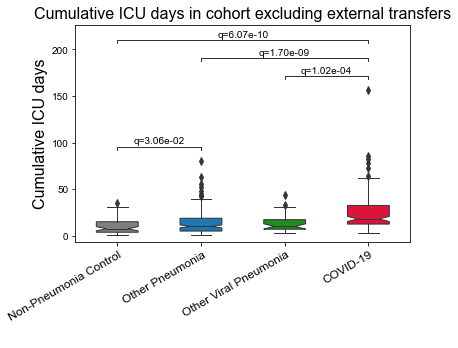

In [56]:
import itertools

import statsmodels.stats.multitest
import statannotations.Annotator
import scipy.stats

not_transferred['Patient_category'] = pd.Categorical(not_transferred['Patient_category'],
                                   categories=['Non-Pneumonia Control', 'Other Pneumonia', 'Other Viral Pneumonia', 'COVID-19'],
                                   ordered=True)
Category_palette = [
    "tab:gray",
    "tab:blue",
    "forestgreen",
    "crimson",
]


fig, ax = plt.subplots()

stats_results = []

for d1, d2 in itertools.combinations(not_transferred.Patient_category.unique(), 2):
        days1 = not_transferred.Cumulative_ICU_days[not_transferred.Patient_category==d1].dropna()
        days2 = not_transferred.Cumulative_ICU_days[not_transferred.Patient_category==d2].dropna()
        if days1.size == 0 or days2.size == 0:
            continue
        pval = scipy.stats.mannwhitneyu(days1, days2).pvalue
        stats_results.append([d1, d2, days1.size, days2.size, pval])

stats_results = pd.DataFrame(stats_results, columns=["group1", "group2",
                                                   "group1_size", "group2_size", "pval"])
stats_results["pval_adj"] = statsmodels.stats.multitest.fdrcorrection(stats_results.pval, alpha=0.05)[1]
stat_results_sign = stats_results.loc[stats_results.pval_adj < 0.05, :]
pairs = []
for _, r in stat_results_sign.iterrows():
        pairs.append((r.group1, r.group2))

sns.boxplot(
    data=not_transferred, 
    x="Patient_category",
    y="Cumulative_ICU_days", 
    ax=ax, 
    saturation=1, 
    linewidth=1,
    width=0.5,
    notch=True, 
    palette = Category_palette,
)

for a in ax.collections:
    if isinstance(a, mpl.collections.PatchCollection):
        # remove line surround each box
        a.set_linewidth(0)
ax.set_ylabel("Cumulative ICU days", size=16)
ax.set_xlabel(" ", size=16)
#ax.set_xticklabels(["non-COVID", "COVID"], size=16)
#ax.legend(loc="upper left")
#ax.legend_.set_bbox_to_anchor((1, 0.8))
ax.tick_params(axis='x', labelsize=12)
trans = mpl.transforms.Affine2D().translate(6, 0)
for t in ax.get_xticklabels():
    t.set_rotation(30)
    t.set_horizontalalignment("right")
    t.set_transform(t.get_transform() + trans)
ax.set_title("Cumulative ICU days in cohort excluding external transfers", size=16);


annotator = statannotations.Annotator.Annotator(
    ax, 
    pairs, 
    data=not_transferred, 
    x="Patient_category",
    y="Cumulative_ICU_days", 
    verbose=False
)
annotator._verbose = False
annotator.configure(line_width=1)
annotator.set_custom_annotations([f"q={x:.2e}" for x in stat_results_sign.pval_adj])
annotator.annotate();


dump_figure('no_externaltransfers_Cumulative_ICU_days.pdf')

In [216]:
mytable = TableOne(intubation_day_one, columns=['ICU_day','SOFA_score','ECMO_flag', 'Intubation_flag', 'Hemodialysis_flag', 'CRRT_flag',
       'Temperature', 'Heart_rate', 'Systolic_blood_pressure',
       'Diastolic_blood_pressure', 'Mean_arterial_pressure',
       'Norepinephrine_rate', 'Norepinephrine_flag', 'Respiratory_rate',
       'Oxygen_saturation', 'Urine_output', 'GCS_eye_opening',
       'GCS_motor_response', 'GCS_verbal_response', 'RASS_score', 'PEEP',
       'FiO2', 'Plateau_Pressure', 'Lung_Compliance', 'PEEP_changes',
       'Respiratory_rate_changes', 'FiO2_changes', 'ABG_pH', 'ABG_PaCO2',
       'ABG_PaO2', 'PaO2FIO2_ratio', 'WBC_count', 'Lymphocytes', 'Neutrophils',
       'Hemoglobin', 'Platelets', 'Bicarbonate', 'Creatinine', 'Albumin',
       'Bilirubin', 'CRP', 'D_dimer', 'Ferritin', 'LDH', 'Lactic_acid',
       'Procalcitonin',], 
                   categorical=[ 'ECMO_flag', 'Intubation_flag', 'Hemodialysis_flag', 'CRRT_flag', 'Norepinephrine_flag', ], 
                   nonnormal = [ 'ICU_day', 'SOFA_score','Temperature', 'Heart_rate', 'Systolic_blood_pressure',
       'Diastolic_blood_pressure', 'Mean_arterial_pressure',
       'Norepinephrine_rate', 'Respiratory_rate',
       'Oxygen_saturation', 'Urine_output', 'GCS_eye_opening',
       'GCS_motor_response', 'GCS_verbal_response', 'RASS_score', 'PEEP',
       'FiO2', 'Plateau_Pressure', 'Lung_Compliance', 'PEEP_changes',
       'Respiratory_rate_changes', 'FiO2_changes', 'ABG_pH', 'ABG_PaCO2',
       'ABG_PaO2', 'PaO2FIO2_ratio', 'WBC_count', 'Lymphocytes', 'Neutrophils',
       'Hemoglobin', 'Platelets', 'Bicarbonate', 'Creatinine', 'Albumin',
       'Bilirubin', 'CRP', 'D_dimer', 'Ferritin', 'LDH', 'Lactic_acid',
       'Procalcitonin', ],
                   groupby='Patient_category', order = {"Patient_category": ["Non-Pneumonia Control", "Other Pneumonia", "Other Viral Pneumonia", "COVID-19"]}, missing=False, overall=False)
mytable

/Users/catgaohow/opt/anaconda3/lib/python3.9/site-packages/tableone/tableone.py:991: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df['percent'] = df['freq'].div(df.freq.sum(level=0),
/Users/catgaohow/opt/anaconda3/lib/python3.9/site-packages/tableone/tableone.py:991: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df['percent'] = df['freq'].div(df.freq.sum(level=0),
/Users/catgaohow/opt/anaconda3/lib/python3.9/site-packages/tableone/tableone.py:991: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df['percent'] =

Grouped by Patient_category                                                                    
                                                 Non-Pneumonia Control        Other Pneumonia  Other Viral Pneumonia              COVID-19
n                                                                   72                    200                     36                   138
ICU_day, median [Q1,Q3]                                  1.0 [1.0,2.0]          1.0 [1.0,2.0]          1.0 [1.0,2.0]         1.0 [1.0,2.0]
SOFA_score, median [Q1,Q3]                             12.0 [9.0,14.2]        12.0 [9.0,14.0]        11.5 [7.8,15.0]       11.0 [9.0,13.0]
ECMO_flag, n (%)                         0                   71 (98.6)             199 (99.5)             36 (100.0)           138 (100.0)
                                         1                     1 (1.4)                1 (0.5)                                             
Intubation_flag, n (%)                   1                  72 (100.0)            200 (100.0)             36 (100.0)           138 (100.0)
Hemodialysis_flag, n (%)                 0                   69 (95.8)             195 (97.5)              35 (97.2)           138 (100.0)
                                         1                     3 (4.2)                5 (2.5)                1 (2.8)                      
CRRT_flag, n (%)                         0                   66 (91.7)             182 (91.0)              31 (86.1)            133 (96.4)
                                         1                     6 (8.3)               18 (9.0)               5 (13.9)               5 (3.6)
Temperature, median [Q1,Q3]                           98.2 [97.6,99.5]       98.3 [97.5,99.4]       98.7 [98.0,99.7]      98.9 [98.3,99.8]
Heart_rate, median [Q1,Q3]                           88.7 [77.3,107.8]      95.2 [82.0,109.9]      99.8 [86.8,112.9]      85.1 [75.5,96.6]
Systolic_blood_pressure, median [Q1,Q3]            112.2 [104.3,130.8]    112.8 [104.1,124.7]    111.7 [106.6,124.9]   117.9 [110.6,126.4]
Diastolic_blood_pressure, median [Q1,Q3]              61.1 [56.1,68.8]       59.8 [55.4,67.7]       59.6 [54.8,65.8]      62.9 [57.4,68.1]
Mean_arterial_pressure, median [Q1,Q3]                61.0 [56.0,68.0]       60.0 [53.0,65.0]       59.5 [55.0,66.2]      61.0 [57.2,66.0]
Norepinephrine_rate, median [Q1,Q3]                      0.2 [0.1,0.3]          0.2 [0.1,0.3]          0.2 [0.1,0.2]         0.1 [0.1,0.2]
Norepinephrine_flag, n (%)               0                   26 (36.1)              74 (37.0)              16 (44.4)             40 (29.0)
                                         1                   46 (63.9)             126 (63.0)              20 (55.6)             98 (71.0)
Respiratory_rate, median [Q1,Q3]                      22.6 [19.3,26.5]       22.3 [19.8,26.1]       23.7 [20.1,27.3]      25.0 [22.0,28.1]
Oxygen_saturation, median [Q1,Q3]                     96.5 [94.9,98.1]       96.7 [95.2,98.0]       96.6 [94.9,98.7]      94.8 [93.6,96.1]
Urine_output, median [Q1,Q3]                      857.5 [461.2,1558.8]   647.5 [244.0,1293.2]   800.0 [190.0,1237.5]  900.0 [483.0,1400.0]
GCS_eye_opening, median [Q1,Q3]                          1.0 [1.0,3.0]          1.0 [1.0,3.0]          1.0 [1.0,2.0]         1.0 [1.0,3.0]
GCS_motor_response, median [Q1,Q3]                       4.0 [1.0,5.0]          4.0 [1.0,5.0]          4.0 [1.0,4.0]         2.0 [1.0,5.0]
GCS_verbal_response, median [Q1,Q3]                      1.0 [1.0,1.0]          1.0 [1.0,1.0]          1.0 [1.0,1.0]         1.0 [1.0,1.0]
RASS_score, median [Q1,Q3]                            -2.0 [-4.0,-1.0]       -2.0 [-3.5,-1.0]       -3.0 [-4.0,-2.0]      -3.0 [-4.0,-2.0]
PEEP, median [Q1,Q3]                                     5.0 [5.0,8.1]          5.0 [5.0,8.9]          5.0 [5.0,7.8]      11.0 [10.0,14.0]
FiO2, median [Q1,Q3]                                  50.0 [45.0,70.5]       59.0 [45.0,75.0]       58.8 [46.7,70.0]      73.3 [60.6,85.0]
Plateau_Pres

In [217]:
dump_table(mytable, 'first_day_intubation_features.csv')

/Users/catgaohow/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 43.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/catgaohow/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 71.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/catgaohow/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/catgaohow/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 57.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Patient_category', ylabel='ICU_day'>

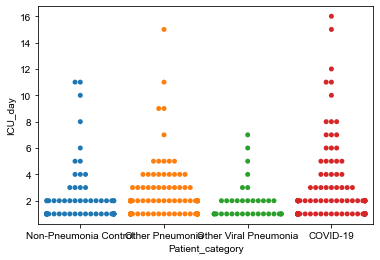

In [62]:
sns.swarmplot(data=intubation_day_one, x='Patient_category', y='ICU_day')

In [138]:
intubation_day_one.groupby('Patient_category')['ICU_day'].describe()

,count,mean,std,min,25%,50%,75%,max
Patient_category,,,,,,,,
COVID-19,141.0,2.468085,2.726990,1.0,1.0,1.0,2.0,16.0
Non-Pneumonia Control,72.0,2.152778,2.224446,1.0,1.0,1.0,2.0,11.0
Other Pneumonia,202.0,1.757426,1.711991,1.0,1.0,1.0,2.0,15.0
Other Viral Pneumonia,36.0,1.916667,1.461408,1.0,1.0,1.0,2.0,7.0


In [60]:
mpl.rcParams['pdf.fonttype'] = 42  # edit-able in illustrator
mpl.rcParams['font.sans-serif'] = 'Arial'
pd.set_option('display.max_columns', None)

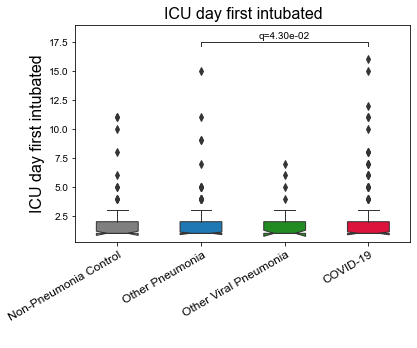

In [139]:



intubation_day_one['Patient_category'] = pd.Categorical(intubation_day_one['Patient_category'],
                                   categories=['Non-Pneumonia Control', 'Other Pneumonia', 'Other Viral Pneumonia', 'COVID-19'],
                                   ordered=True)
Category_palette = [
    "tab:gray",
    "tab:blue",
    "forestgreen",
    "crimson",
]


fig, ax = plt.subplots()


stats_results = []

for d1, d2 in itertools.combinations(intubation_day_one.Patient_category.unique(), 2):
        days1 = intubation_day_one.ICU_day[intubation_day_one.Patient_category==d1].dropna()
        days2 = intubation_day_one.ICU_day[intubation_day_one.Patient_category==d2].dropna()
        if days1.size == 0 or days2.size == 0:
            continue
        pval = scipy.stats.mannwhitneyu(days1, days2).pvalue
        stats_results.append([d1, d2, days1.size, days2.size, pval])

stats_results = pd.DataFrame(stats_results, columns=["group1", "group2",
                                                   "group1_size", "group2_size", "pval"])
stats_results["pval_adj"] = statsmodels.stats.multitest.fdrcorrection(stats_results.pval, alpha=0.05)[1]
stat_results_sign = stats_results.loc[stats_results.pval_adj < 0.05, :]
pairs = []
for _, r in stat_results_sign.iterrows():
        pairs.append((r.group1, r.group2))



sns.boxplot(
    data=intubation_day_one, 
    x="Patient_category",
    y="ICU_day", 
    ax=ax, 
    saturation=1, 
    linewidth=1,
    width=0.5,
    notch=True, 
    palette = Category_palette,
)
# sns.swarmplot(
#     data=dem, 
#     x="Patient_category",
#     y="Worst_SOFA_first_two_days", 
#     ax=ax, size=0.5,
#     palette = Category_PALETTE,
# )
for a in ax.collections:
    if isinstance(a, mpl.collections.PatchCollection):
        # remove line surround each box
        a.set_linewidth(0)
ax.set_ylabel("ICU day first intubated", size=16)
ax.set_xlabel(" ", size=16)
#ax.set_xticklabels(["non-COVID", "COVID"], size=16)
#ax.legend(loc="upper left")
#ax.legend_.set_bbox_to_anchor((1, 0.8))
ax.tick_params(axis='x', labelsize=12)
trans = mpl.transforms.Affine2D().translate(6, 0)
for t in ax.get_xticklabels():
    t.set_rotation(30)
    t.set_horizontalalignment("right")
    t.set_transform(t.get_transform() + trans)
ax.set_title("ICU day first intubated", size=16);

annotator = statannotations.Annotator.Annotator(
    ax, 
    pairs, 
    data=intubation_day_one, 
    x="Patient_category",
    y="ICU_day", 
    verbose=False
)
annotator._verbose = False
annotator.configure(line_width=1)
annotator.set_custom_annotations([f"q={x:.2e}" for x in stat_results_sign.pval_adj])
annotator.annotate();

dump_figure('first_ICU_day_intubated.pdf')

In [63]:
# set categorical order
intubation_day_one['Patient_category'] = pd.Categorical(intubation_day_one['Patient_category'],
                                   categories=['Non-Pneumonia Control', 'Other Pneumonia', 'Other Viral Pneumonia', 'COVID-19'],
                                   ordered=True)


Category_palette = [
    "tab:gray",
    "tab:blue",
    "forestgreen",
    "crimson",
]

/Users/catgaohow/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 44.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/catgaohow/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 71.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/catgaohow/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/catgaohow/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 57.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


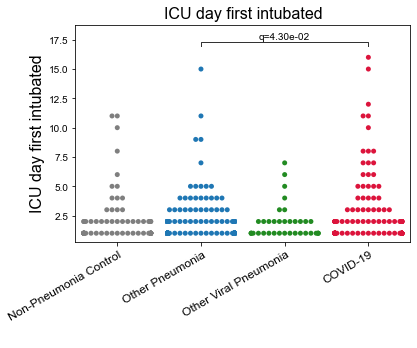

In [140]:


fig, ax = plt.subplots()


stats_results = []

for d1, d2 in itertools.combinations(intubation_day_one.Patient_category.unique(), 2):
        days1 = intubation_day_one.ICU_day[intubation_day_one.Patient_category==d1].dropna()
        days2 = intubation_day_one.ICU_day[intubation_day_one.Patient_category==d2].dropna()
        if days1.size == 0 or days2.size == 0:
            continue
        pval = scipy.stats.mannwhitneyu(days1, days2).pvalue
        stats_results.append([d1, d2, days1.size, days2.size, pval])

stats_results = pd.DataFrame(stats_results, columns=["group1", "group2",
                                                   "group1_size", "group2_size", "pval"])
stats_results["pval_adj"] = statsmodels.stats.multitest.fdrcorrection(stats_results.pval, alpha=0.05)[1]
stat_results_sign = stats_results.loc[stats_results.pval_adj < 0.05, :]
pairs = []
for _, r in stat_results_sign.iterrows():
        pairs.append((r.group1, r.group2))


sns.swarmplot(data=intubation_day_one, x='Patient_category', y='ICU_day', palette=[
    "tab:gray",
    "tab:blue",
    "forestgreen",
    "crimson",
])

for a in ax.collections:
    if isinstance(a, mpl.collections.PatchCollection):
        # remove line surround each box
        a.set_linewidth(0)
ax.set_ylabel("ICU day first intubated", size=16)
ax.set_xlabel(" ", size=16)
#ax.set_xticklabels(["non-COVID", "COVID"], size=16)
#ax.legend(loc="upper left")
#ax.legend_.set_bbox_to_anchor((1, 0.8))
ax.tick_params(axis='x', labelsize=12)
trans = mpl.transforms.Affine2D().translate(6, 0)
for t in ax.get_xticklabels():
    t.set_rotation(30)
    t.set_horizontalalignment("right")
    t.set_transform(t.get_transform() + trans)
ax.set_title("ICU day first intubated", size=16);

annotator = statannotations.Annotator.Annotator(
    ax, 
    pairs, 
    data=intubation_day_one, 
    x="Patient_category",
    y="ICU_day", 
    verbose=False
)
annotator._verbose = False
annotator.configure(line_width=1)
annotator.set_custom_annotations([f"q={x:.2e}" for x in stat_results_sign.pval_adj])
annotator.annotate();

dump_figure('first_ICU_day_intubated_swarm.pdf')

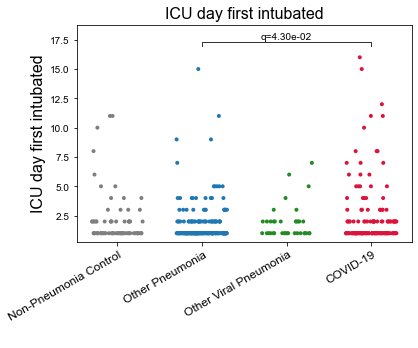

In [141]:


fig, ax = plt.subplots(figsize=(6, 4))


stats_results = []

for d1, d2 in itertools.combinations(intubation_day_one.Patient_category.unique(), 2):
        days1 = intubation_day_one.ICU_day[intubation_day_one.Patient_category==d1].dropna()
        days2 = intubation_day_one.ICU_day[intubation_day_one.Patient_category==d2].dropna()
        if days1.size == 0 or days2.size == 0:
            continue
        pval = scipy.stats.mannwhitneyu(days1, days2).pvalue
        stats_results.append([d1, d2, days1.size, days2.size, pval])

stats_results = pd.DataFrame(stats_results, columns=["group1", "group2",
                                                   "group1_size", "group2_size", "pval"])
stats_results["pval_adj"] = statsmodels.stats.multitest.fdrcorrection(stats_results.pval, alpha=0.05)[1]
stat_results_sign = stats_results.loc[stats_results.pval_adj < 0.05, :]
pairs = []
for _, r in stat_results_sign.iterrows():
        pairs.append((r.group1, r.group2))


sns.stripplot(data=intubation_day_one, x='Patient_category', y='ICU_day', size=4, jitter=0.3, palette=[
    "tab:gray",
    "tab:blue",
    "forestgreen",
    "crimson",
])

for a in ax.collections:
    if isinstance(a, mpl.collections.PatchCollection):
        # remove line surround each box
        a.set_linewidth(0)
ax.set_ylabel("ICU day first intubated", size=16)
ax.set_xlabel(" ", size=16)
#ax.set_xticklabels(["non-COVID", "COVID"], size=16)
#ax.legend(loc="upper left")
#ax.legend_.set_bbox_to_anchor((1, 0.8))
ax.tick_params(axis='x', labelsize=12)
trans = mpl.transforms.Affine2D().translate(6, 0)
for t in ax.get_xticklabels():
    t.set_rotation(30)
    t.set_horizontalalignment("right")
    t.set_transform(t.get_transform() + trans)
ax.set_title("ICU day first intubated", size=16);

annotator = statannotations.Annotator.Annotator(
    ax, 
    pairs, 
    data=intubation_day_one, 
    x="Patient_category",
    y="ICU_day", 
    verbose=False
)
annotator._verbose = False
annotator.configure(line_width=1)
annotator.set_custom_annotations([f"q={x:.2e}" for x in stat_results_sign.pval_adj])
annotator.annotate();

dump_figure('first_ICU_day_intubated_stripplot.pdf')

In [8]:
cluster_counts = data.drop_duplicates(subset=['clusters','Patient_id']).groupby(['clusters','Patient_category']).size().reset_index().rename(columns={0:'count'}).pivot(index=['clusters',], columns='Patient_category',values='count').reset_index()

In [9]:
data.drop_duplicates(subset=['clusters','Patient_id']).groupby(['clusters','Patient_category']).size().reset_index().rename(columns={0:'count'}).pivot(index=['clusters',], columns='Patient_category',values='count').reset_index()

Patient_category,clusters,Non-Pneumonia Control,Other Pneumonia,Other Viral Pneumonia,COVID-19
0,1,17,78,20,89
1,2,19,54,10,52
2,3,40,104,24,58
3,4,53,147,35,117
4,5,17,52,10,129
5,6,9,33,5,75
6,7,56,175,32,70
7,8,21,46,11,28
8,9,25,69,9,23
9,10,24,90,18,115


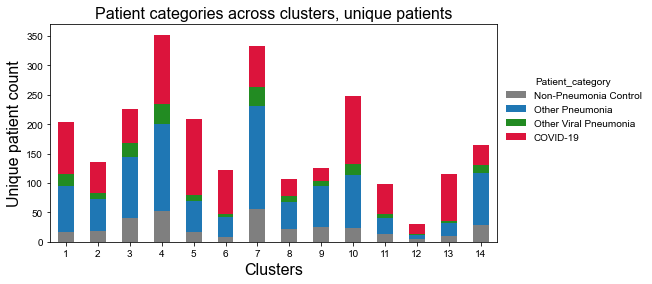

In [164]:

fig, ax = plt.subplots(figsize=(8, 4))
cluster_counts.set_index('clusters').plot(kind='bar', stacked=True,ax=ax,color = [
    "tab:gray",
    "tab:blue",
    "forestgreen",
    "crimson",
],)

ax.legend_.set_bbox_to_anchor((1, 0.8))
ax.legend_.set_frame_on(False)
ax.set_ylabel("Unique patient count", size=16)
ax.set_xlabel("Clusters", size=16)
ax.set_title("Patient categories across clusters, unique patients", size=16);

trans = mpl.transforms.Affine2D().translate(6, 0)
for t in ax.get_xticklabels():
    t.set_rotation(0)
    # t.set_horizontalalignment("right")
    # t.set_transform(t.get_transform() + trans)

dump_figure('patient_category_across_clusters.pdf')

In [155]:
# set categorical order
data['Patient_category'] = pd.Categorical(data['Patient_category'],
                                   categories=['Non-Pneumonia Control', 'Other Pneumonia', 'Other Viral Pneumonia', 'COVID-19'],
                                   ordered=True)


Category_palette = [
    "tab:gray",
    "tab:blue",
    "forestgreen",
    "crimson",
]

In [156]:
cluster_days_count = data.groupby(['clusters','Patient_category']).size().reset_index().rename(columns={0:'count'}).pivot(index=['clusters',], columns='Patient_category',values='count').reset_index()

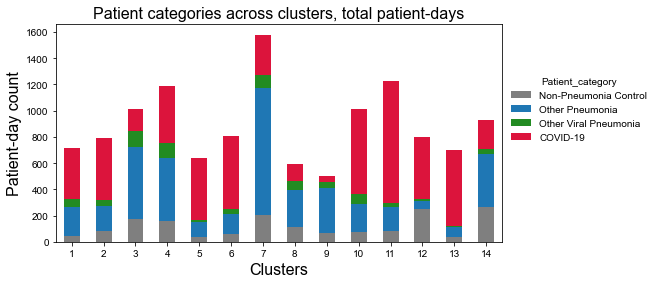

In [163]:

fig, ax = plt.subplots(figsize=(8, 4))
cluster_days_count.set_index('clusters').plot(kind='bar', stacked=True,ax=ax,color = [
    "tab:gray",
    "tab:blue",
    "forestgreen",
    "crimson",
],)

ax.legend_.set_bbox_to_anchor((1, 0.8))
ax.legend_.set_frame_on(False)
ax.set_ylabel("Patient-day count", size=16)
ax.set_xlabel("Clusters", size=16)
ax.set_title("Patient categories across clusters, total patient-days", size=16);

trans = mpl.transforms.Affine2D().translate(6, 0)
for t in ax.get_xticklabels():
    t.set_rotation(0)
    # t.set_horizontalalignment("right")
    # t.set_transform(t.get_transform() + trans)

dump_figure('patientday_category_across_clusters.pdf')